In [ ]:
pip install google-api-python-client

In [ ]:
pip install apiclient

  Preparing metadata (setup.py) ... done
  Created wheel for apiclient: filename=apiclient-1.0.4-py3-none-any.whl size=5195 sha256=684ad9f2d065b8aa143c1b132f3969ad4b56abada8d4416539621e035d733bee
  Stored in directory: /root/.cache/pip/wheels/9b/08/37/e058c64cfe64d1e24408246af36d7fe2bad9bac21a8b0959fa
Successfully built apiclient


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Youtube Video') #change to your location

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import libraries
%matplotlib inline
from googleapiclient.discovery import build
import requests
from datetime import datetime, timedelta

In [ ]:
import pandas as pd
from googleapiclient.discovery import build
import time
from google.colab import userdata
DEVELOPER_KEY= userdata.get('YouTubeKey')

# arguments to be passed to build function
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

# create youtube resource object for interacting with API
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
                    developerKey=DEVELOPER_KEY)

# **Mine YouTube by Keywords**

In [ ]:
import time
import pandas as pd

mo='06'

def get_videos_from_page(published_after, published_before, order_method="date", max_pages=50):
    all_videos = []
    next_page_token = None

    for _ in range(max_pages):
        try:
          search_response = youtube.search().list(
              part="snippet",
              q="gameplay walkthrough -music -coding",
              type="video",
              order=order_method,  # ÊîπÂèòÊéíÂ∫èÊñπÂºè
              videoDuration='medium', #Êó∂Èïø
              publishedAfter=published_after,
              publishedBefore=published_before,
              maxResults=50,
              pageToken=next_page_token
          ).execute()

          all_results = search_response.get("items", [])
          video_ids = [item['id']['videoId'] for item in all_results]
          next_page_token = search_response.get("nextPageToken", None)

          if not video_ids:
              break

          video_response = youtube.videos().list(
              part="snippet,statistics",
              id=",".join(video_ids)
          ).execute()

          for video in video_response.get('items', []):
              title = video['snippet']['title']
              video_id = video['id']
              description = video['snippet'].get('description', "").replace("\n", " ")
              published_at = video['snippet']['publishedAt'][:10]
              video_url = f"https://www.youtube.com/watch?v={video_id}"
              view_count = int(video['statistics'].get('viewCount', 0))

              all_videos.append([title, description, published_at, view_count, video_url])

          print(f"[{order_method}] Fetched {len(all_results)} videos, nextPageToken: {next_page_token}")
          if not next_page_token:
              break

          time.sleep(2)

        except Exception as e:
          print(f"Error: {e}")
    df = pd.DataFrame(all_videos, columns=["Title", "Description", "Published Date", "Views", "URL"])
    return df.sort_values(by="Published Date", ascending=False)


# **Êåâ 3 Â§©‰∏∫Âçï‰ΩçÊäìÂèñÊï∞ÊçÆÔºåÂπ∂Áî®‰∏çÂêå order ÊéíÂ∫è**
final_df = pd.DataFrame(columns=["Title", "Description", "Published Date", "Views", "URL"])
date_ranges = [
    (f"2024-{mo}-01", f"2024-{mo}-03"),
    (f"2024-{mo}-04", f"2024-{mo}-06"),
    (f"2024-{mo}-07", f"2024-{mo}-09"),
    (f"2024-{mo}-10", f"2024-{mo}-12"),
    (f"2024-{mo}-13", f"2024-{mo}-15"),
    (f"2024-{mo}-16", f"2024-{mo}-18"),
    (f"2024-{mo}-19", f"2024-{mo}-21"),
    (f"2024-{mo}-22", f"2024-{mo}-24"),
    (f"2024-{mo}-25", f"2024-{mo}-27"),
    (f"2024-{mo}-28", f"2024-{mo}-30"),   # ÊØè‰∏™ÊúàÊúÄÂêé‰∏ÄÂ§©‰∏ç‰∏ÄÊ†∑
]

# 3 Áßç order ÊñπÂºè
order_methods = ["date", "relevance", "rating"]

for start_date, end_date in date_ranges:
    for order in order_methods:
        published_after = f"{start_date}T00:00:00Z"
        published_before = f"{end_date}T23:59:59Z"
        print(f"Fetching videos from {start_date} to {end_date} using order: {order}...")

        df_videos = get_videos_from_page(published_after, published_before, order_method=order, max_pages=10)
        final_df = pd.concat([final_df, df_videos], ignore_index=True)

# **ÂéªÈáç**
final_df = final_df.drop_duplicates(subset=["URL"])

# **‰øùÂ≠òÊúÄÁªàÊï∞ÊçÆ**
final_df.to_csv(f"youtube_videos_M_{mo}_2024.csv", mode='a', header=False, index=False)
print(f"Êï∞ÊçÆËé∑ÂèñÂÆåÊàêÔºÅÂÖ±Áà¨Âèñ {len(final_df)} Êù°Êï∞ÊçÆÔºàÂéªÈáçÂêéÔºâ")


Fetching videos from 2024-06-01 to 2024-06-03 using order: date...
[date] Fetched 32 videos, nextPageToken: None
Fetching videos from 2024-06-01 to 2024-06-03 using order: relevance...
[relevance] Fetched 38 videos, nextPageToken: None
Fetching videos from 2024-06-01 to 2024-06-03 using order: rating...
[rating] Fetched 32 videos, nextPageToken: None
Fetching videos from 2024-06-04 to 2024-06-06 using order: date...
[date] Fetched 38 videos, nextPageToken: None
Fetching videos from 2024-06-04 to 2024-06-06 using order: relevance...
[relevance] Fetched 45 videos, nextPageToken: None
Fetching videos from 2024-06-04 to 2024-06-06 using order: rating...
[rating] Fetched 38 videos, nextPageToken: None
Fetching videos from 2024-06-07 to 2024-06-09 using order: date...
[date] Fetched 30 videos, nextPageToken: None
Fetching videos from 2024-06-07 to 2024-06-09 using order: relevance...
[relevance] Fetched 34 videos, nextPageToken: None
Fetching videos from 2024-06-07 to 2024-06-09 using order:

# **Data Processing**

In [ ]:
import pandas as pd

all_df = pd.read_excel('YT_all.xls')
all_df = all_df.iloc[:, :5]
all_df = all_df.dropna()

In [ ]:
all_df.to_csv('YT_all_clean.csv', index=False)

# **BURT Model**

In [ ]:
!pip install bertopic

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 150.6/150.6 kB 5.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 80.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
#import BERTopic
from bertopic import BERTopic

#bring in libraries with different purposes

# Data processing
import pandas as pd
import numpy as np

# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
Example = pd.read_csv('YT_all_clean.csv', encoding='latin1')
Example['Information'] = Example['Title'].astype(str) + ' ' + Example['Description'].astype(str)
train_sample = Example[['Information']].sample(frac=0.8, random_state=42)

In [ ]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

train_sample['Message_without_stopwords'] = train_sample['Information'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization
train_sample['Message_lemmatized'] = train_sample['Message_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

# Take a look at the data
train_sample.head()

There are 198 default stopwords. They are ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own',

Information  \
879   War of Rafts: Crazy Sea Battle - Gameplay Walk...   
1988  Super Bear Adventure - Gameplay Walkthrough Pa...   
889   IT BURNS - Galaxy S24 Ultra gaming SAMSUNG Gal...   
912   Ben 10 - Omnitrix Hero Gameplay Walkthrough | ...   
1596  NEW UPDATE 11.0.1 Super Bear Adventure Gamepla...   

                              Message_without_stopwords  \
879   War Rafts: Crazy Sea Battle - Gameplay Walkthr...   
1988  Super Bear Adventure - Gameplay Walkthrough Pa...   
889   BURNS - Galaxy S24 Ultra gaming SAMSUNG Galaxy...   
912   Ben 10 - Omnitrix Hero Gameplay Walkthrough | ...   
1596  NEW UPDATE 11.0.1 Super Bear Adventure Gamepla...   

                                     Message_lemmatized  
879   War Rafts: Crazy Sea Battle - Gameplay Walkthr...  
1988  Super Bear Adventure - Gameplay Walkthrough Pa...  
889   BURNS - Galaxy S24 Ultra gaming SAMSUNG Galaxy...  
912   Ben 10 - Omnitrix Hero Gameplay Walkthrough | ...  
1596  NEW UPDATE 11.0.1 Super Bear Adventure Gamepla...

Predefined Topics. I used predefined topics because if I use the method of "find as many as you can" it will result in too many topics based on different video structures and types, instead of solely based on the game genres.

In [ ]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

In [ ]:
zeroshot_topic_list = [
    "Role-playing game (RPG)",
    "Action game",
    "Adventure game",
    "Shooter game (FPS/TPS)",
    "Simulation game",
    "Strategy game",
    "Sports and Racing game",
    "Music and Dance game",
    "Survival game",
    "Card game",
    "Horror game",
    "Multiplayer Online game",
    "Sandbox game",
    "Puzzle game"
]

In [ ]:
topic_model = BERTopic(
    embedding_model="thenlper/gte-small",
    min_topic_size=15,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.85,
    representation_model=KeyBERTInspired()
)
topics, probs = topic_model.fit_transform(train_sample.Message_lemmatized)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0      -1    452                    -1_commander_gameplay_army_game   
1       0      2                            Role-playing game (RPG)   
2       1    163                                        Action game   
3       2    230                                     Adventure game   
4       3     11                             Shooter game (FPS/TPS)   
5       4     26                                    Simulation game   
6       5     12                                      Strategy game   
7       6     34                             Sports and Racing game   
8       7     41                                      Survival game   
9       8      2                                          Card game   
10      9    128                                        Horror game   
11     10     12                            Multiplayer Online game   
12     11     13                                       Sandbox game   
13     12     68                                        Puzzle game   
14     13     22                    13_smaghetti_smb3_nintendo_sma4   
15     14     22                  14_bowmasters_bowmen_bow_gameplay   
16     15     19  15_drawingvideos_drawinganime_sketchinganime_d...   
17     16     21         16_plantsvszombies2_zombies_zombie_battlez   
18     17     25  17_update_walkthrough_gameplay_superbearadventure   
19     18     75                18_secret_walkthrough_bear_gameplay   
20     19     20          19_iosgames_androidgames_pizza_pizzaready   
21     20     26           20_airdrops_airdrop_crypto_altcryptotalk   
22     21     30  21_roomscapes_roomscapesmain_escapewalkthrough...   
23     22     36          22_minecraft_gratecraft_realms_curseforge   
24     23     16    23_tom_walkthrough_talkingtomandfriends_talking   
25     24     32  24_gameplay_banmonsterlifechallenge4_game_walk...   
26     25     25  25_poppyplaytimechapter3_poppyplaytimechapter4...   
27     26     86        26_robloxgames_robloxobby_roblox_robloxedit   
28     27     54                    27_game_gameplay_games_stickman   
29     28     16       28_manualidades_audiencia_entrenamiento_todo   
30     29     91                      29_youtube_editing_video_edit   
31     30     32               30_brawlstars_brawl_brawlers_brawler   
32     31     23          31_2048balls_2048game_gameplay_multiballs   
33     32     42                  32_gameplay_mobilegame_games_game   
34     33     48  33_indianbikesdriving3dgame_indianbikesdriving...   
35     34     20                       34_soccer_gameplay_fc_league   
36     35     71                          35_beatrix_item_mobile_pc   
37     36     47        36_mortalkombat_gameplay_gamingstudio_60fps   
38     37     15  37_shadowfight2shades_shadowfightgames_shadowf...   
39     38    111       38_gameplay_androidgameplay_iosagameplay_ios   

                                       Representation  \
0   [commander, gameplay, army, game, games, walkt...   
1   [summoners, mmorpg, summoner, rpg, dungeon, ga...   
2   [gameplay, games, stickman, game, walkthrough,...   
3   [rexblaxgaming2, gameplay, walkthrough, platfo...   
4   [gameplay, shooter, sniper, fps, games, game, ...   
5   [gameplay, game, simulator, simulation, sim, w...   
6   [gameplay, warfare, games, game, war, pocketga...   
7   [kart, racers, racer, nickelodeon, racing, gam...   
8   [gameplay, walkthrough, games, game, zombies, ...   
9   [nfl2kcardbattler, roguelike, cards, poker, ca...   
10  [gameplay, horrorgaming, walkthrough, game, ga...   
11  [multiplayerparkour, craftworldmultiplayer, mu...   
12  [minecraft, mojang, gameplay, sandbox, game, c...   
13  [puzzles, tricky, puzzle, challenging, riddle,...   
14  [smaghetti, smb3, nintendo, sma4, gameboyadvan...   
15  [bowmasters, bowmen, bow, gameplay, walkthroug...   
16  [drawingvideos, drawinganime, sketchinganime, ...   
17  [plantsvszombies2, zombies, zombie, battlez, g...   
18  [upda

In [ ]:
topic_model.visualize_barchart(top_n_topics=5)

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
map=topic_model.visualize_heatmap()

In [ ]:
# get similarity matrix from hitmap
similarity_matrix = map['data'][0]['z']

import pandas as pd
correlation_df = pd.DataFrame(similarity_matrix)

# Â§ÑÁêÜÁõ∏ÂÖ≥ÊÄßÁ≥ªÊï∞ÔºåÊü•ÁúãÁõ∏ÂÖ≥ÊÄßÂ§ß‰∫é0.92ÁöÑ‰∏ªÈ¢òÂØπ
topics_to_merge = []
for i in range(12, similarity_matrix.shape[0]):  # ‰ªéTopic 13ÂºÄÂßã
    # ÊâæÂà∞‰∏éÂâç12‰∏™TopicÊúÄÁõ∏ÂÖ≥ÁöÑ‰∏Ä‰∏™
    most_correlated_topic_index = correlation_df.iloc[i, :12].idxmax()  # Ëé∑ÂèñÊúÄÁõ∏ÂÖ≥ÁöÑÂâç12‰∏™Topic
    max_correlation_value = correlation_df.iloc[i, :12].max()

    # Â¶ÇÊûúÁõ∏ÂÖ≥ÊÄßÁ≥ªÊï∞Â§ß‰∫éÁ≠â‰∫é0.92ÔºåÂêàÂπ∂Ëøô‰∫õ‰∏ªÈ¢ò
    if max_correlation_value >= 0.92:
        topics_to_merge.append([i, most_correlated_topic_index])

# ËæìÂá∫ÈúÄË¶ÅÂêàÂπ∂ÁöÑ‰∏ªÈ¢òÂØπ
print("\nTopics to merge:")
for topic_to_merge in topics_to_merge:
    print(f"Topic {topic_to_merge[0]} can be merged with Topic {topic_to_merge[1]} with correlation coefficient {similarity_matrix[topic_to_merge[0], topic_to_merge[1]]}")


In [ ]:
print(topics_to_merge)

[[12, 9], [14, 1], [16, 1], [17, 2], [18, 2], [19, 4], [21, 9], [22, 11], [23, 1], [24, 9], [25, 9], [26, 9], [27, 1], [29, 4], [30, 1], [31, 1], [32, 1], [33, 4], [34, 1], [35, 1], [36, 1], [37, 11], [38, 1]]


In [ ]:
# ÂêàÂπ∂ÊâÄÊúâÂåÖÂê´1-13ÁöÑ‰∏ªÈ¢òÂØπÔºåÂπ∂‰∏îÊØè‰∏™‰∏ªÈ¢òÂØπÂÜÖÁöÑÂÖÉÁ¥†‰ªéÂ§ßÂà∞Â∞èÊéíÂàó
merged_topics_to_merge = []

# Áî®‰∏Ä‰∏™Â≠óÂÖ∏Êù•Ë∑üË∏™ÊØè‰∏™‰∏ªÈ¢òÁöÑÊâÄÊúâÂêàÂπ∂ÂØπ
merged_sets = {}

for pair in topics_to_merge:
    # Ê£ÄÊü•ÊòØÂê¶ÂåÖÂê´1Âà∞13‰πãÈó¥ÁöÑ‰∏ªÈ¢ò
    if any(topic in range(1, 14) for topic in pair):
        # ÊéíÂ∫èËØ•‰∏ªÈ¢òÂØπÔºåÁ°Æ‰øù‰ªéÂ§ßÂà∞Â∞è
        sorted_pair = tuple(sorted(pair, reverse=True))

        # ÊâæÂà∞ÊàñÂàõÂª∫Áõ∏ÂÖ≥ÁöÑÈõÜÂêàÔºåÂπ∂ÂêàÂπ∂‰∏ªÈ¢ò
        found = False
        for key in list(merged_sets.keys()):
            if sorted_pair[1] in merged_sets[key]:
                merged_sets[key].update(sorted_pair)
                found = True
                break
        if not found:
            merged_sets[sorted_pair[0]] = set(sorted_pair)

# Â∞ÜÊØè‰∏™ÂêàÂπ∂ÂêéÁöÑÈõÜÂêàËΩ¨Êç¢‰∏∫ÂàóË°®Âπ∂ÊéíÂ∫è
for merged_set in merged_sets.values():
    merged_topics_to_merge.append(sorted(list(merged_set), reverse=True))

# ËæìÂá∫ÂêàÂπ∂ÂêéÁöÑÂàóË°®
print("Merged Topics to Merge (with Topics 1-13):")
print(merged_topics_to_merge)


Merged Topics to Merge (with Topics 1-13):
[[26, 25, 24, 21, 12, 9], [38, 36, 35, 34, 32, 31, 30, 27, 23, 16, 14, 1], [18, 17, 2], [33, 29, 19, 4], [37, 22, 11]]


In [ ]:
# Topic to merge
topics_to_merge = merged_topics_to_merge
#we merged topic 3 and topic 4 together
# Merge topics
topic_model.merge_topics(train_sample['Message_lemmatized'], topics_to_merge)

# Get the list of topics
topic_model.get_topic_info()

Topic  Count                                               Name  \
0      -1    452                 -1_gameplay_walkthrough_game_games   
1       0      2                            Role-playing game (RPG)   
2       3     11                      3_gameplay_shooter_sniper_fps   
3       5     12                                      Strategy game   
4       6     34                             Sports and Racing game   
5       7     41                  7_gameplay_walkthrough_games_game   
6       8      2                                          Card game   
7      10     12                            Multiplayer Online game   
8      13     22                    13_smaghetti_smb3_nintendo_sma4   
9      15     19  15_drawingvideos_drawinganime_sketchinganime_d...   
10     18    330                                     Adventure game   
11     20     26           20_airdrops_airdrop_crypto_altcryptotalk   
12     26    369                                        Horror game   
13     28     16    28_manualidades_youtube_audiencia_entrenamiento   
14     33    185                                    Simulation game   
15     37     64                                       Sandbox game   
16     38    622                                        Action game   

                                       Representation  \
0   [gameplay, walkthrough, game, games, commander...   
1   [summoners, mmorpg, gameplay, summoner, rpg, d...   
2   [gameplay, shooter, sniper, fps, games, game, ...   
3   [gameplay, warfare, games, game, war, pocketga...   
4   [kart, racers, racer, nickelodeon, racing, gam...   
5   [gameplay, walkthrough, games, game, zombies, ...   
6   [nfl2kcardbattler, game, roguelike, cards, pok...   
7   [multiplayerparkour, craftworldmultiplayer, mu...   
8   [smaghetti, smb3, nintendo, sma4, gameboyadvan...   
9   [drawingvideos, drawinganime, sketchinganime, ...   
10  [gameplay, rexblaxgaming2, walkthrough, platfo...   
11  [airdrops, airdrop, crypto, altcryptotalk, alt...   
12  [gameplay, horrorgaming, game, walkthrough, ga...   
13  [manualidades, youtube, audiencia, entrenamien...   
14  [editing, youtube, edit, video, instagram, tre...   
15  [gameplay, minecraft, shadow, walkthrough, sha...   
16  [gameplay, games, game, walkthrough, fortnite,...   

                                  Representative_Docs  
0   [Army Commander - Gameplay Walkthrough Part 40...  
1   [Raziel Rebirth: Dungeon Raid - English Beta G...  
2   [POLYWAR - Gameplay Walkthrough Part 44 - NEW ...  
3   [Fight America: Country War Gameplay Walkthrou...  
4   [Nickelodeon Kart Racers 3 - Characters Stages...  
5   [Wasteland Life - Gameplay Walkthrough Part 2 ...  
6   [Balatro Beginner's Guide - Tips Tricks Tutori...  
7   [Multiplayer Parkour Craft World 2024 Gameplay...  
8   [SMAGHETTI | SMA4: SMB3 CUSTOM LEVELS #1595 ==...  
9   [Art Drawing | draw drawing video drawing vide...  
10  [Super Bear Adventure Gameplay Walkthrough Sec...  
11  [Berachain Airdrop Tutorial [FREE CRYPTO AIRDR...  
12  [Monster House - Gameplay Walkthrough Part 1 T...  
13  [Eliminar cuenta google ZTE 8050 como omitir c...  
14  [New style purulia status Editing Alightmotion...  
15  [Shades - Gameplay Walkthrough Part 8 - Act 2:...  
16  [Rumble Club - Gameplay Walkthrough Part 1 Tut...

In [ ]:
topic_model.save("YT_model")

# Load the topic model
my_model = BERTopic.load("YT_model")

2025-03-24 22:22:43,025 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
Example['Topic'] = my_model.transform(Example['Information'])[0]

In [ ]:
Example.to_csv('YT_all_topic.csv', index=False)

# **Find Game Genre**

In [ ]:
df=pd.read_csv('YT_all_topic.csv')


In [ ]:
# Modify the function to handle mixed date formats and use week-based grouping

def calculate_weekly_trend_summary(df, date_col="Published Date", view_col="View", topic_col="Topic"):
    # Handle mixed date formats using 'mixed' option
    df[date_col] = pd.to_datetime(df[date_col], format='mixed', errors='coerce')
    df = df.dropna(subset=[date_col])  # Drop rows with invalid dates

    # Create a 'Week' column representing the start of the week for each date
    df['Week'] = df[date_col].apply(lambda x: x - pd.Timedelta(days=x.weekday()))

    # Identify the last two weeks
    latest_week = df['Week'].max()
    previous_week = latest_week - pd.Timedelta(weeks=1)

    # Filter for each of the two weeks
    week1_mask = df['Week'] == previous_week
    week2_mask = df['Week'] == latest_week

    # Aggregate view counts by topic for the two weeks
    week1_views = df[week1_mask].groupby(topic_col)[view_col].sum().rename("Week1_Views")
    week2_views = df[week2_mask].groupby(topic_col)[view_col].sum().rename("Week2_Views")

    # Merge and calculate percentage change
    trend_df = pd.concat([week1_views, week2_views], axis=1).fillna(0)
    trend_df["Change (%)"] = ((trend_df["Week2_Views"] - trend_df["Week1_Views"]) / trend_df["Week1_Views"].replace(0, 1)) * 100

    # Define trend status
    def classify_status(change):
        if change > 50:
            return "Rising"
        elif change < -50:
            return "Falling"
        else:
            return "Stable"

    trend_df["Status"] = trend_df["Change (%)"].apply(classify_status)

    return trend_df.reset_index()

# Apply the modified function to the current DataFrame
trend_summary_weekly_df = calculate_weekly_trend_summary(df)
trend_summary_weekly_df


Topic  Week1_Views  Week2_Views    Change (%)   Status
0      -1    5860839.0     375608.0 -9.359122e+01  Falling
1       0       6519.0          0.0 -1.000000e+02  Falling
2       1       1528.0      18702.0  1.123953e+03   Rising
3       2        616.0       2915.0  3.732143e+02   Rising
4       3       7728.0      38160.0  3.937888e+02   Rising
5       4      52099.0      49200.0 -5.564406e+00   Stable
6       6      63777.0       9482.0 -8.513257e+01  Falling
7       9     109128.0     403661.0  2.698968e+02   Rising
8      10       3918.0          0.0 -1.000000e+02  Falling
9      11     925430.0     668671.0 -2.774483e+01   Stable
10     13      17320.0      71368.0  3.120554e+02   Rising
11     14        867.0    5556868.0  6.408306e+05   Rising
12     15     543593.0      94980.0 -8.252737e+01  Falling
13      8          0.0        162.0  1.620000e+04   Rising
14     12          0.0    1664999.0  1.664999e+08   Rising

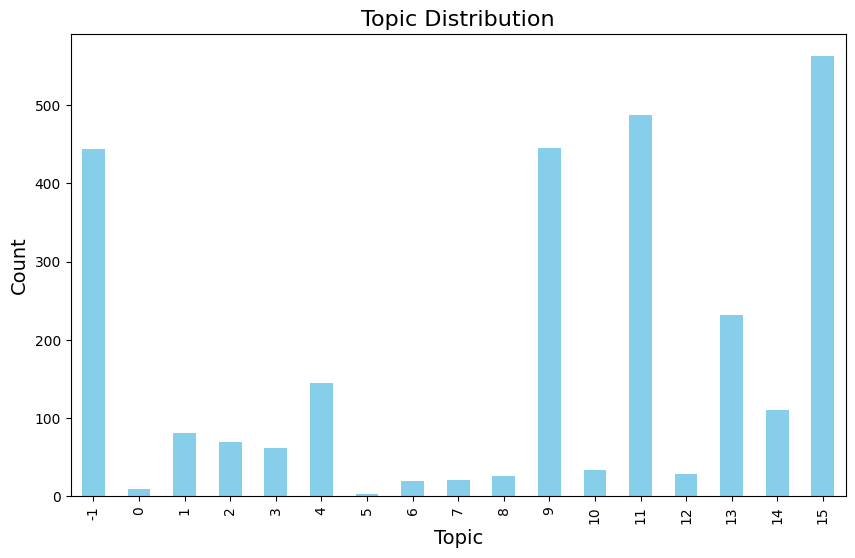

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ËÆ°ÁÆóÊØè‰∏™‰∏ªÈ¢òÁöÑÂá∫Áé∞Ê¨°Êï∞
topic_counts = df['Topic'].value_counts()

# ÊåâÁÖß‰∏ªÈ¢òÁºñÂè∑ÊéíÂ∫è
topic_counts = topic_counts.sort_index()

# ÁªòÂà∂Êù°ÂΩ¢Âõæ
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue')

# Ê∑ªÂä†Ê†áÈ¢òÂíåÊ†áÁ≠æ
plt.title('Topic Distribution', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Ë∞ÉÊï¥ X ËΩ¥Ê†áÁ≠æËßíÂ∫¶
plt.xticks(rotation=90)
plt.show()


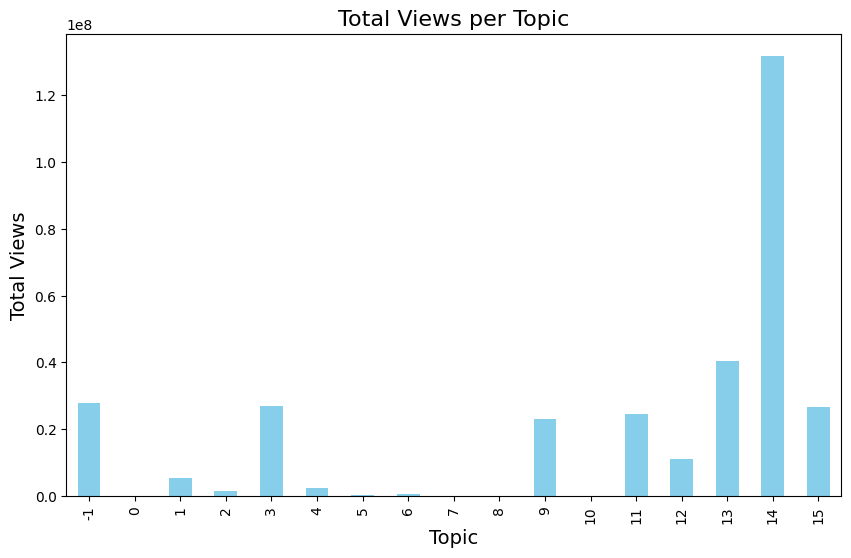

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ËÆ°ÁÆóÊØè‰∏™‰∏ªÈ¢òÁöÑÊÄªÊí≠ÊîæÈáè
topic_view_counts = df.groupby('Topic')['View'].sum()

# ÁªòÂà∂Êù°ÂΩ¢Âõæ
plt.figure(figsize=(10, 6))
topic_view_counts.plot(kind='bar', color='skyblue')

# Ê∑ªÂä†Ê†áÈ¢òÂíåÊ†áÁ≠æ
plt.title('Total Views per Topic', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Total Views', fontsize=14)

# Ë∞ÉÊï¥ X ËΩ¥Ê†áÁ≠æËßíÂ∫¶
plt.xticks(rotation=90)
plt.show()


In [ ]:
#transform datetime format
df.loc[:457, 'Published Date'] = pd.to_datetime(df['Published Date'], errors='coerce')
df.loc[458:, 'Published Date'] = pd.to_datetime(df.loc[458:, 'Published Date'], format='%Y/%m/%d %H:%M', errors='coerce')

In [ ]:
df.dropna(subset=['Published Date'], inplace=True)

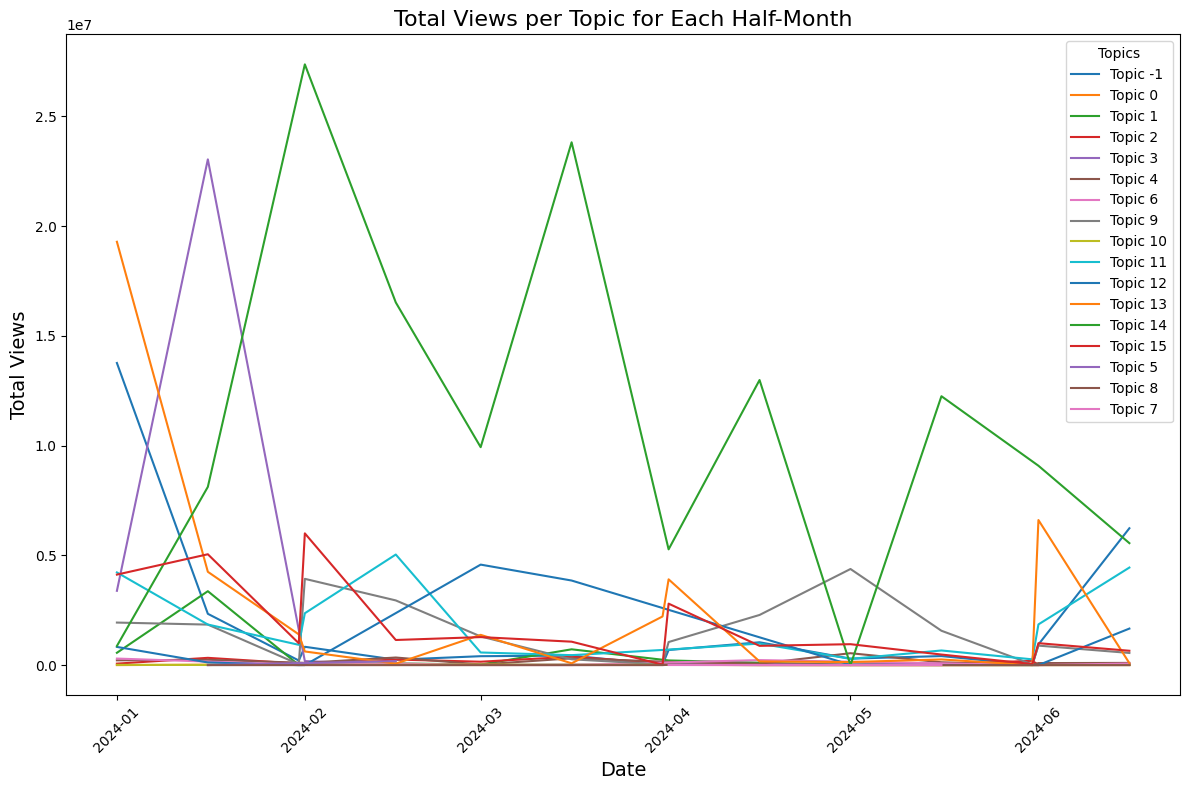

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑÂàóÔºåË°®Á§∫ÊØè‰∏™Êó•ÊúüÊâÄÂ±ûÁöÑÂçäÊúàÔºà‰æãÂ¶ÇÔºö1Êúà1Êó•Âà∞15Êó•‰∏∫Á¨¨‰∏Ä‰∏™ÂçäÊúàÔºå16Êó•Âà∞ÊúàÂ∫ï‰∏∫Á¨¨‰∫å‰∏™ÂçäÊúàÔºâ
df['HalfMonth'] = df['Published Date'].apply(lambda x: pd.Timestamp(year=x.year, month=x.month, day=1) + pd.DateOffset(days=(x.day-1)//15 * 15))

# ÊåâÁÖß 'HalfMonth' Âíå 'Topic' ÂàÜÁªÑÔºåÂπ∂ËÆ°ÁÆóÊØè‰∏™ÂàÜÁªÑÁöÑÊí≠ÊîæÈáèÊÄªÂíå
topic_play_counts = df.groupby(['HalfMonth', 'Topic'])['View'].sum().reset_index()

# ÁªòÂà∂ÊäòÁ∫øÂõæ
plt.figure(figsize=(12, 8))

# ÁªòÂà∂ÊØè‰∏™‰∏ªÈ¢òÁöÑÊäòÁ∫ø
for topic in topic_play_counts['Topic'].unique():
    topic_data = topic_play_counts[topic_play_counts['Topic'] == topic]
    plt.plot(topic_data['HalfMonth'], topic_data['View'], label=f'Topic {topic}')

# Ê∑ªÂä†Ê†áÈ¢òÂíåÊ†áÁ≠æ
plt.title('Total Views per Topic for Each Half-Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Views', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Topics')

# ÊòæÁ§∫ÂõæË°®
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Á°Æ‰øù HalfMonth Âíå View ÊòØÊ≠£Á°ÆÁöÑÊï∞ÊçÆÁ±ªÂûã
df['HalfMonth'] = pd.to_datetime(df['HalfMonth'])
df['View'] = pd.to_numeric(df['View'])

# ÊâæÂá∫ÊúÄÂêé‰∏§‰∏™ HalfMonth
half_months = sorted(df['HalfMonth'].unique())
last_halfmonth = half_months[-1]
second_last_halfmonth = half_months[-2]

# ÂàÜÂà´ËÆ°ÁÆó‰∏§‰∏™ HalfMonth ‰∏≠ÊØè‰∏™ Topic ÁöÑÊÄª View
view_last = df[df['HalfMonth'] == last_halfmonth].groupby('Topic')['View'].sum()
view_prev = df[df['HalfMonth'] == second_last_halfmonth].groupby('Topic')['View'].sum()

# ÂØπÈΩê‰∏§‰∏™ SeriesÔºàÊúâ‰∫õ Topic ÂèØËÉΩÂè™Âú®‰∏Ä‰∏™ halfmonth Âá∫Áé∞Ôºâ
view_diff = view_last.subtract(view_prev, fill_value=0)

# ÊâæÂá∫Â¢ûÈïøÊúÄÂ§öÁöÑ Topic
top_topic = view_diff.idxmax()
summ = view_diff.sort_values(ascending=False)


In [ ]:
 summ

Topic
-1     5296580.0
 11    2590109.0
 12    1662775.0
 6       70776.0
 3       37157.0
 4        8341.0
 0        6519.0
 10        160.0
 8         147.0
 2       -1266.0
 1      -35273.0
 9     -334663.0
 15    -346225.0
 14   -3526808.0
 13   -6520654.0
Name: View, dtype: float64

In [ ]:
df.to_csv('YT_all_topic_date_new.csv', index=False)

From the analysis above, we can see that the most popular game type is Sandbox Game. So I would recommand our client to look into this type of game, since it has a more stable view compared to other types, meaning that in any given time it will be a safer investment option with less variance

For the newly emerging game genre, they are type 11 (horror game) and 12 (manualidades_youtube_audiencia_entrenamiento)

# **Sentiment Analysis**

In [ ]:
df=pd.read_csv('YT_all_topic_date_new.csv')
top_10_views_topic_14 = df[df['Topic'] == 14].nlargest(10, 'View')
top_10_views_topic_14

Title  \
1875                       HOW I BECAME A MILLIONAIRE!!   
921                   I Built a Whip that Crushes Bones   
1300           1 vs 1 Billion Block Build in Minecraft!   
2267                  WARDENS vs. The Most Secure House   
514           Level 1 to 100 Magic Tricks Anyone Can Do   
1257               Minecraft, But Mining Is OVERPOWERED   
664   Minecraft NOOB vs PRO: The Roulette of OP Weapons   
182                     LEGO Vehicles vs All Terrain...   
2447                           Lava Rises Every Minute!   
565              SECRET TREE HOUSE You will Never Find!   

                                            Description       Published Date  \
1875  Today, we're opening up shops to earn tons is ...  2024-04-29 00:00:00   
921   Instagram: https://www.instagram.com/mikeshake...  2024-02-28 00:00:00   
1300  A billion is such an UNIMAGINABLE number to me...  2024-03-23 00:00:00   
2267  Today, we're in big trouble! An Ancient City h...  2024-05-25 00:00:00   
514   These are level 1 to 100 magic tricks anyone c...  2024-02-03 00:00:00   
1257  Today, we're going mining with some overpowere...  2024-03-20 00:00:00   
664   Today, we're playing PVP Roulette! Each of the...  2024-02-10 00:00:00   
182   Check out Krazy Ky's Bricklink Store for your ...  2024-01-27 00:00:00   
2447  Today, we've gotta hurry! Lava is quickly rais...  2024-06-09 00:00:00   
565   Today, we've having a house building competiti...  2024-02-05 00:00:00   

          View                                         Link  \
1875  12869340  https://www.youtube.com/watch?v=G4opf4amUZ4   
921   12657174  https://www.youtube.com/watch?v=G63jjvibWmk   
1300  12365283  https://www.youtube.com/watch?v=W0zZ3cG729s   
2267  11946472  https://www.youtube.com/watch?v=-7AhPzV6yi8   
514   11011358  https://www.youtube.com/watch?v=eGewFYQhJEQ   
1257   8210846  https://www.youtube.com/watch?v=z2N20UEvQ0A   
664    7891161  https://www.youtube.com/watch?v=2sC3tlVEMXM   
182    5922662  https://www.youtube.com/watch?v=tVtrHDNOCRM   
2447   5835950  https://www.youtube.com/watch?v=NDOwRuHt_Fo   
565    5703913  https://www.youtube.com/watch?v=jOVd0ZSJzXo   

                                            Information  Topic   HalfMonth  
1875  HOW I BECAME A MILLIONAIRE!! Today, we're open...     14  2024-04-16  
921   I Built a Whip that Crushes Bones Instagram: h...     14  2024-02-16  
1300  1 vs 1 Billion Block Build in Minecraft! A bil...     14  2024-03-16  
2267  WARDENS vs. The Most Secure House Today, we're...     14  2024-05-16  
514   Level 1 to 100 Magic Tricks Anyone Can Do Thes...     14  2024-02-01  
1257  Minecraft, But Mining Is OVERPOWERED Today, we...     14  2024-03-16  
664   Minecraft NOOB vs PRO: The Roulette of OP Weap...     14  2024-02-01  
182   LEGO Vehicles vs All Terrain... Check out Kraz...     14  2024-01-16  
2447  Lava Rises Every Minute! Today, we've gotta hu...     14  2024-06-01  
565   SECRET TREE HOUSE You will Never Find! Today, ...     14  2024-02-01

In the top 10 sandbox videos, 8 of them are about Minecraft. 1 is about Lego and another is about some real-world game. So we're pretty sure that Minecraft is the most popular sandbox game right now, even if it's a relatively old game (released in 2009). The reasons might be it's a game that can inspire people's creativity, so YT minecraft videos are always fun to watch. It also might be because Minecraft has been keeping on updating new features to retain players. In the next section, by analyzing the comments, we further explore how people view Minecraft, and want to explore why it's popular and fun to watch.

In [ ]:
df=pd.read_csv('YT_all_topic_date_new.csv')
top_10_views_topic_11 = df[df['Topic'] == 11].nlargest(10, 'View')
top_10_views_topic_11

Title  \
883              Overnight In The Real Conjuring House!   
2585                                  Home Alone Roblox   
438                           Teke Teke Horror Gameplay   
2359  Help Out Story: Tricky Puzzle - Gameplay Walkt...   
344   Ice Scream 8 Experiment - Outwitt Mod | Shiva ...   
685   ROBLOX - GREAT SCHOOL BREAKOUT! Gameplay Walkt...   
494   Green Monster Life Challenge 4 - Gameplay Walk...   
356   Through the Wall (WEEGOON) - Funny Stickman - ...   
24    Help Me: Tricky Story - Part 1 All Level - Gam...   
2565  SCHOOLBOY RUNAWAY STEALTH - ACT 1 ESCAPE FULL ...   

                                            Description       Published Date  \
883   This was by far the scariest place I have ever...  2024-02-27 00:00:00   
2585  Today, we've been left home alone! That means ...  2024-06-16 00:00:00   
438   Teke Teke Horror Gameplay Like Aim: 17k #teket...  2024-01-07 00:00:00   
2359  Help Out Story: Tricky Puzzle Pure Guide - Gam...  2024-06-02 00:00:00   
344   Ice Scream 8 Experiment - Outwitt Mod leke aay...  2024-01-15 00:00:00   
685   ROBLOX - GREAT SCHOOL BREAKOUT! Gameplay Walkt...  2024-02-14 00:00:00   
494   Green Monster Life Challenge 4 - Gameplay Walk...  2024-02-01 00:00:00   
356   Through the Wall (WEEGOON) - Funny Stickman - ...  2024-01-04 00:00:00   
24    Help Me: Tricky Story - Part 1 All Level - Gam...  2024-01-28 00:00:00   
2565  SCHOOLBOY RUNAWAY STEALTH - ACT 1 ESCAPE FULL ...  2024-06-17 00:00:00   

         View                                         Link  \
883   4133617  https://www.youtube.com/watch?v=5j9_Ilwdpfw   
2585  2774961  https://www.youtube.com/watch?v=stte9jaGWjM   
438   1883981  https://www.youtube.com/watch?v=_cbqeOvh3pU   
2359  1194613  https://www.youtube.com/watch?v=yNclpKz7SNA   
344   1001156  https://www.youtube.com/watch?v=38izLvb606U   
685    746240  https://www.youtube.com/watch?v=R0_G9AXkEmg   
494    716160  https://www.youtube.com/watch?v=GYtOckVMNZo   
356    675237  https://www.youtube.com/watch?v=jJANVuwQhfM   
24     643300  https://www.youtube.com/watch?v=Noow0PANBPk   
2565   637420  https://www.youtube.com/watch?v=jlOO_GoLJwk   

                                            Information  Topic   HalfMonth  
883   Overnight In The Real Conjuring House! This wa...     11  2024-02-16  
2585  Home Alone Roblox Today, we've been left home ...     11  2024-06-16  
438   Teke Teke Horror Gameplay Teke Teke Horror Gam...     11  2024-01-01  
2359  Help Out Story: Tricky Puzzle - Gameplay Walkt...     11  2024-06-01  
344   Ice Scream 8 Experiment - Outwitt Mod | Shiva ...     11  2024-01-01  
685   ROBLOX - GREAT SCHOOL BREAKOUT! Gameplay Walkt...     11  2024-02-01  
494   Green Monster Life Challenge 4 - Gameplay Walk...     11  2024-02-01  
356   Through the Wall (WEEGOON) - Funny Stickman - ...     11  2024-01-01  
24    Help Me: Tricky Story - Part 1 All Level - Gam...     11  2024-01-16  
2565  SCHOOLBOY RUNAWAY STEALTH - ACT 1 ESCAPE FULL ...     11  2024-06-16

In [ ]:
df=pd.read_csv('YT_all_topic_date_new.csv')
top_10_views_topic_12 = df[df['Topic'] == 12].nlargest(10, 'View')
top_10_views_topic_12

Title  \
977            ??FUNDAS QUE PARECEN TORTAS? e?¬°√®¬°¬ße??¬°√Ä   
1345  e???Mi Nueva Peligrosa Mascota Ataca Todo lo q...   
2718  A CADA BOUNTY EU USO UM NOVO ESTILO DE LUTA no...   
203   DISEGNA QUESTO E NON TI ANNOIERAIe??¬°√Äa?¬°√®???t...   
379   Jugu?? al Juego con Gr??ficos mas Realistas BO...   
38    NASCITA DEL FIGLIO DI MOLLETTINOe???a?¬°√®???Com...   
189   Personalizza i GADGET di SCUOLA e fai colpo su...   
366   Rispondo alle vostre DOMANDEa?¬°√®???e?¬°√®-mi con...   
432   PRIMEIRA GAMEPLAY JOGANDO HAWKED!! NOVO JOGO G...   
2083  SEO YouTube: Aprende a mejorar la retenci√É¬≥n d...   

                                            Description       Published Date  \
977   Holaaaaa, vayan a seguirme en Instagram para e...  2024-03-03 00:00:00   
1345  e??¬°√§Habla con Bruno y Joel aqu?- : https://t....  2024-03-26 00:00:00   
2718               Minha Loja - https://lojadolucao.com  2024-06-26 00:00:00   
203   TUTORIAL DEI DISEGNI DA FARE QUANDO TI ANNOIe?...  2024-01-14 00:00:00   
379   a??e???suscribete es gratis! e??? a??Z Drinks ...  2024-01-14 00:00:00   
38    ?? NATO IL FIGLIO DI MOLLETTINO E MOLLETTINAe?...  2024-01-10 00:00:00   
189   PERSONALIZZO I GADGET DI SCUOLA A TEMA SAN VAL...  2024-01-28 00:00:00   
366   RISPONDO ALLE VOSTRE DOMANDENDEe???a?? Finalme...  2024-01-18 00:00:00   
432   Galera Se Liga S?3!! PRIMEIRA GAMEPLAY TESTAND...  2024-01-04 00:00:00   
2083  En este v√É¬≠deo te ense√É¬±o SEO Youtube Aprende ...  2024-05-13 00:00:00   

         View                                         Link  \
977   4579606  https://www.youtube.com/watch?v=rFwv07Pprps   
1345  3853709  https://www.youtube.com/watch?v=om-DQP6QuaY   
2718  1664999  https://www.youtube.com/watch?v=7v4eMyBToAg   
203    599068  https://www.youtube.com/watch?v=HDC4dxFv3hU   
379    103011  https://www.youtube.com/watch?v=XZ9jMrcgnDA   
38     100194  https://www.youtube.com/watch?v=9epThiJ0iPw   
189     84197  https://www.youtube.com/watch?v=_gkvIWuNtbY   
366     26234  https://www.youtube.com/watch?v=TYtzqnfVg1M   
432     18321  https://www.youtube.com/watch?v=UDU7vFIaFW0   
2083    15151  https://www.youtube.com/watch?v=_C7TBgnBbuE   

                                            Information  Topic   HalfMonth  
977   ??FUNDAS QUE PARECEN TORTAS? e?¬°√®¬°¬ße??¬°√Ä Holaa...     12  2024-03-01  
1345  e???Mi Nueva Peligrosa Mascota Ataca Todo lo q...     12  2024-03-16  
2718  A CADA BOUNTY EU USO UM NOVO ESTILO DE LUTA no...     12  2024-06-16  
203   DISEGNA QUESTO E NON TI ANNOIERAIe??¬°√Äa?¬°√®???t...     12  2024-01-01  
379   Jugu?? al Juego con Gr??ficos mas Realistas BO...     12  2024-01-01  
38    NASCITA DEL FIGLIO DI MOLLETTINOe???a?¬°√®???Com...     12  2024-01-01  
189   Personalizza i GADGET di SCUOLA e fai colpo su...     12  2024-01-16  
366   Rispondo alle vostre DOMANDEa?¬°√®???e?¬°√®-mi con...     12  2024-01-16  
432   PRIMEIRA GAMEPLAY JOGANDO HAWKED!! NOVO JOGO G...     12  2024-01-01  
2083  SEO YouTube: Aprende a mejorar la retenci√É¬≥n d...     12  2024-05-01

# **Get Video Comments**

In [ ]:
import csv

def youtube_video_comments(video_id, max_results=10000, output_file='youtube_comments.csv'):
    comments = []
    next_page_token = None
    part = "id,snippet,replies"

    while len(comments) < max_results:
        response = youtube.commentThreads().list(
            videoId=video_id,
            part=part,
            maxResults=min(100, max_results - len(comments)),
            order="time",
            textFormat="plainText",
            pageToken=next_page_token
        ).execute()

        for item in response['items']:
            comment = {
                'id': item['id'],
                'text': item['snippet']['topLevelComment']['snippet']['textDisplay'],
                'likes': item['snippet']['topLevelComment']['snippet']['likeCount']
            }
            comments.append(comment)

        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    # Save to CSV
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['id', 'text', 'likes']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for comment in comments:
            writer.writerow(comment)

    print(f"‚úÖ Saved {len(comments)} comments to {output_file}")
    return comments


In [ ]:
comments = youtube_video_comments("G4opf4amUZ4", max_results=10000)

‚úÖ Saved 813 comments to youtube_comments.csv


In [ ]:
comment1=pd.read_csv('youtube_comments.csv')

In [ ]:
# Sort comments by likes in descending order
comment_sorted1 = comment1.sort_values(by='likes', ascending=False)


# **Analyze Video Comments**

In [ ]:
from google.colab import userdata
DEVELOPER_KEY= userdata.get('OpenAIKey')#here, put in the name you have for your OpenAI key

In [ ]:
from openai import OpenAI

client = OpenAI(
       api_key=DEVELOPER_KEY,
)


In [ ]:
!pip install langchain langchain-openai langchain-community

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.1/60.1 kB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.5/2.5 MB 17.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 420.1/420.1 kB 14.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 11.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.47
    Uninstalling langchain-core-0.3.47:
      Successfully uninstalled langchain-core-0.3.47


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import FewShotPromptTemplate, PromptTemplate
from langchain.chains import LLMChain
import os
from tqdm import tqdm

In [ ]:
# Few-shot examples for different frames
examples = [
    {
        "frame": "get likes",
        "text": "only true maizen fans can like like this comment."
    },
    {
        "frame": "video content",
        "text": "JJ's shop looks cool."or "Cute jj and mikey." or "	Who knows mikey is in creative mode tooüòäüòÖ"
    },
    {
        "frame": "Content Creator",
        "text": "	Best Minecraft YouTuber Ever!!! üèÜüèÜüèÜ." or "	your videos are very amazing please support these guys."
    },
    {
        "frame": "About the game itself",
        "text": "Roblox beter then Minecraft." or "If you want diamonds stop playing in 1.12 or whatever version, play real Minecraft, or at least 1.18+"
    },
     {
        "frame": "Other",
        "text": "Hi" or "3:43 pls" or "	5 mins ago" or "12th lol"
    },]

# Define the example template
example_template = """Frame: {frame}
Text: {text}
"""

# Create a Few-Shot Prompt Template for classification
few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=PromptTemplate(input_variables=["frame", "text"], template=example_template),
    prefix="Below are examples of how different types of comments are defined.",
    suffix="Classify the following youtube comments into one of the 4 types: get likes, video content, About the game itself, Other.\nDescription: {description}\nFrame:",
    input_variables=["description"]
)

#please note here I changed the suffix for the new task
# Initialize OpenAI LLM
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0, openai_api_key=DEVELOPER_KEY)

# Create a LangChain pipeline
chain = LLMChain(prompt=few_shot_prompt, llm=llm)

In [ ]:
tqdm.pandas()  # Enable progress bar
comment_sorted1["Frame"] = comment_sorted1["text"].progress_apply(lambda x: chain.run(description=x))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 813/813 [06:41<00:00,  2.03it/s]


In [ ]:
comment_sorted1_copy=comment_sorted1.copy()

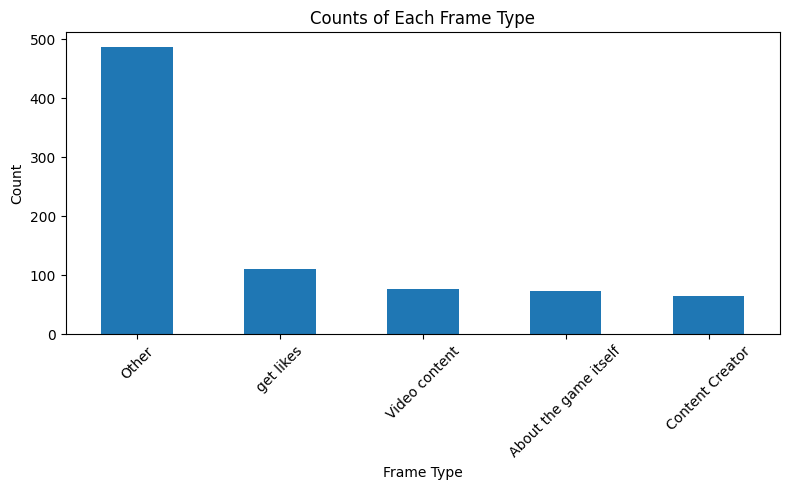

In [ ]:
comment_sorted1_copy['Frame'] = comment_sorted1_copy['Frame'].str.split('\n').str[0]
comment_sorted1_copy['Frame'] = comment_sorted1_copy['Frame'].replace({
    'About': 'About the game itself',
    'Get likes': 'get likes',
    'video content': 'Video content'
})

frame_counts = comment_sorted1_copy['Frame'].value_counts()

plt.figure(figsize=(8, 5))
frame_counts.plot(kind='bar')

plt.title("Counts of Each Frame Type")
plt.xlabel("Frame Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
creator = comment_sorted1_copy[comment_sorted1_copy['Frame'] == 'Content Creator']
creator.head(10)


In [ ]:
video_content = comment_sorted1_copy[comment_sorted1_copy['Frame'] == 'Video content']
video_content.head(10)


In [ ]:
game = comment_sorted1_copy[comment_sorted1_copy['Frame'] == 'About the game itself']
game.head(10)

Actually "About the game itself" is all about content creator and the video content. Looking at these examples, it's kinda hard to seperate them. But what we're sure is that there's a lack of comments talking about the techniques of Minecraft itself. Probably because this game is already familiar by majority. So the focus is more lean toward the video and content.

In [ ]:
df_content = comment_sorted1_copy[comment_sorted1_copy['Frame'].isin([
    'About the game itself', 'Content Creator', 'Video content'
])]


In [ ]:
df_content

id  \
655  UgyZhhffamrIwhNvQQ94AaABAg   
776  Ugx3xtbxa-ghyxEl5hd4AaABAg   
768  Ugxjv6I5QCqoIKuunnZ4AaABAg   
786  Ugw3_xzgMDNdxggaqF54AaABAg   
758  UgxcGaK2sMZhlE8wjpp4AaABAg   
..                          ...   
25   UgxjbJkL-hTHqF50zmN4AaABAg   
765  UgylhuZxpgzEbF7m1Ex4AaABAg   
260  UgzJy8zoz1bbB5pp7vl4AaABAg   
263  UgyR9MSab-j8l2mMLwp4AaABAg   
264  UgxdabPWx0ynSnLiCvJ4AaABAg   

                                                  text  likes            Frame  
655  Who noticed JJ was in creative mode he could g...     95    Video content  
776                Best Minecraft YouTuber Ever!!! üèÜüèÜüèÜ     74  Content Creator  
768  Your videos are the best I promise I am always...     58  Content Creator  
786  Who loves Maizen‚Äôs Minecraft videos and how th...     53  Content Creator  
758                 Hi maizen, luv u and ur videos sm!     52  Content Creator  
..                                                 ...    ...              ...  
25                         0:08 JJ is in creative üòÖüòÖüòÖüòÖ      0    Video content  
765                    Love this video less go diamond      0    Video content  
260                            Maizen yutuber the best      0  Content Creator  
263                                 Aku suka banget JJ      0  Content Creator  
264  7:24 Break grass and go under the house and gr...      0    Video content  

[215 rows x 4 columns]

In [ ]:
!pip install wordcloud

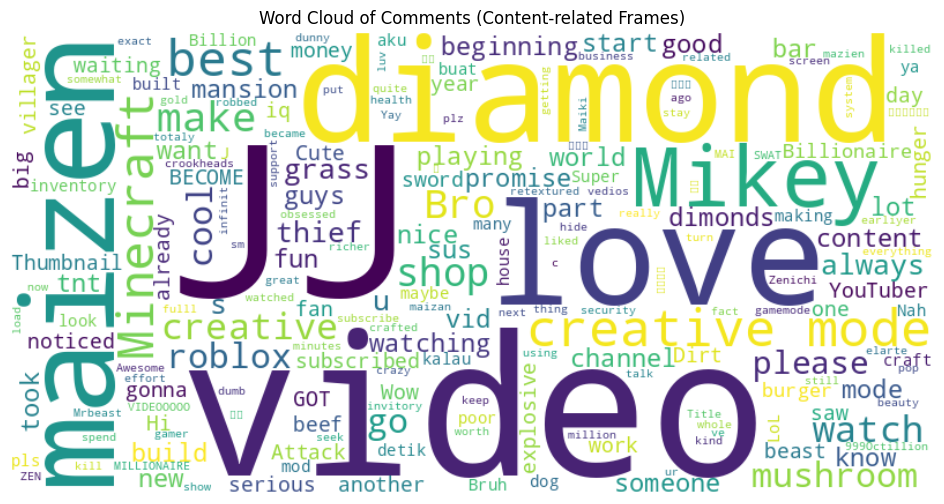

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(df_content['text'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Comments (Content-related Frames)")
plt.show()


In [ ]:
# Few-shot examples for different frames
examples = [
    {
        "frame": "Positive",
        "text": "I love this video."
    },
    {
        "frame": "Negative",
        "text": "This video is boring" or "I'm so disappointed"
    }]

# Define the example template
example_template = """Frame: {frame}
Text: {text}
"""

# Create a Few-Shot Prompt Template for classification
few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=PromptTemplate(input_variables=["frame", "text"], template=example_template),
    prefix="Below are examples of how different types of comments are defined.",
    suffix="Classify the following youtube comments into one of the 2 types: Positive and Negative.\nDescription: {description}\nFrame:",
    input_variables=["description"]
)

#please note here I changed the suffix for the new task
# Initialize OpenAI LLM
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0, openai_api_key=DEVELOPER_KEY)

# Create a LangChain pipeline
chain = LLMChain(prompt=few_shot_prompt, llm=llm)

In [ ]:
tqdm.pandas()  # Enable progress bar
df_content["Frame"] = df_content["text"].progress_apply(lambda x: chain.run(description=x))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 215/215 [01:49<00:00,  1.96it/s]
<ipython-input-98-1e1bd9951309>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content["Frame"] = df_content["text"].progress_apply(lambda x: chain.run(description=x))


In [ ]:
df_content

<ipython-input-101-efc89bfabb69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['Frame'] = df_content['Frame'].str.split('\n').str[0]


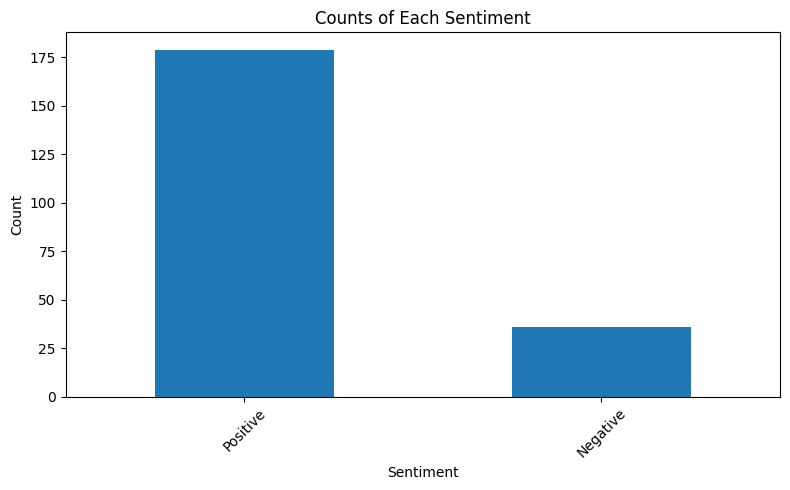

In [ ]:
df_content['Frame'] = df_content['Frame'].str.split('\n').str[0]
frame_counts = df_content['Frame'].value_counts()

plt.figure(figsize=(8, 5))
frame_counts.plot(kind='bar')

plt.title("Counts of Each Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Negative = df_content[df_content['Frame'] == 'Negative']

In [ ]:
Negative

id  \
644  UgwNqrsZnBIdIfa5wn14AaABAg   
183  UgxSa8ACzGdXvKt7Fyh4AaABAg   
65   UgwxmEiBdDdYGcLg6Pp4AaABAg   
467  UgwVhpjvuOWTqhFAdTB4AaABAg   
518  UgymXL77VZl21tI3zmF4AaABAg   
649  UgxwHoc-qTcpN8V3_eR4AaABAg   
536  Ugyvo7UuTWrWkQRNq2Z4AaABAg   
673  UgxWwFymWQQ1yA1aSgd4AaABAg   
50   UgxnKBJh6LECg-yVmNN4AaABAg   
441  Ugz_ZVpRY5aN-WXqksF4AaABAg   
461  Ugy1ucTM2maBNLEHzc54AaABAg   
215  Ugz-2Om6PnaRg0c0Dud4AaABAg   
418  UgxiVNd5T1Ukeiy7LwN4AaABAg   
330  UgzUM_BXy_hF9N15V9x4AaABAg   
1    UgwBH-WyhfY68Ix1sxB4AaABAg   
10   UgyA2fqpJYNy71xH0gd4AaABAg   
254  UgySgQ5uwudPMAhDlHJ4AaABAg   
289  UgyFZ02_upx9JOKXkGZ4AaABAg   
249  UgzWltdt25_Pyq0b0iB4AaABAg   
373  UgwxrNezYJEa8JQ-Op14AaABAg   
232  UgwymuYT7mZI6ZpL9jl4AaABAg   
233  UgxY6k6QEVjPEf2J0S14AaABAg   
406  UgxkYDq1oeZpTDeF1bd4AaABAg   
408  UgwoUhMkqrmHE56DETJ4AaABAg   
211  Ugxf1TaZLshzKdPyWKl4AaABAg   
175  Ugw1McjHBGkVoN1gaJ54AaABAg   
538  UgxjQSybS8yFZdlcsg54AaABAg   
519  UgxPSqnd7To_QIoBo9Z4AaABAg   
575  UgzgKoeYNrGr_22GK614AaABAg   
596  UgxOqsXVwM9z1ZguLPx4AaABAg   
640  UgwWR92n4DmXxleHU6d4AaABAg   
675  UgzKh19VDpYVHDA1IJ54AaABAg   
54   UgwJKSeknX-U5Ogqm2h4AaABAg   
746  UgwGbXnX-S503VNEJSR4AaABAg   
756  UgyWY8lJ_NfTdPVTMRB4AaABAg   
23   Ugy7UnNSrOypgz2M3UJ4AaABAg   

                                                  text  likes     Frame  
644                       JJ: We can't stay like this!      3  Negative  
183  At the start why does jj have no health and hu...      2  Negative  
65   12:24 the "explosive mushrooms" are just retex...      2  Negative  
467       Are you serious gamemode c get from invitory      2  Negative  
518  Mikey wants to kill someone using mushrooms th...      1  Negative  
649                       the thief already killed him      1  Negative  
536  jj was being dumb,he should have crafted a dia...      1  Negative  
673                                               Dirt      1  Negative  
50                   i  not   love  to   took  diamons      1  Negative  
441  The Billionaire ate a burger instead of an exp...      1  Negative  
461                 Bro din't craft a sword or a hands      1  Negative  
215                                    Why grass? 3:28      1  Negative  
418  If you want diamonds stop playing in 1.12 or w...      1  Negative  
330                      I hat the theef üò°üò°üò°üò°üò°üò§üò§üò±üò°üò°üò°üò°üò°      1  Negative  
1                               Nah, mikeys shop sucks      0  Negative  
10                                            You lose      0  Negative  
254                              No more tnt mushrooms      0  Negative  
289  Bruh at the start of the video they‚Äôre on crea...      0  Negative  
249  Itukak jj pakai motkan soalnya kokpaspakek arm...      0  Negative  
373  if he is poor at the start how is does he own ...      0  Negative  
232  Bro all of that diomonds  is not\nGanna fit in...      0  Negative  
233                    Minecraft apa yang kamu mainkan      0  Negative  
406  I am so sorry for maizen because they lost all...      0  Negative  
408                              Is attack!!! ‚Äè‚Ä™1:16‚Ä¨‚Äè      0  Negative  
211                             TNT nah I am the thief      0  Negative  
175  Super bad thief dog im Super angry he was stol...      0  Negative  
538  What did you guys get the Diamonds to build th...      0  Negative  
519                           Why sell grass to humans      0  Negative  
575  1:10 is same as 31:51 or 12:10 many diamonds r...      0  Negative  
596                        How many video maizen have?      0  Negative  
640   i already see all for this is in Japanese maizen      0  Negative  
675                                          26minutes      0  Negative  
54                                   Grass? Seriouslyüòë      0  Negative  
746                         0.55 has a weird  villager      0  Negative  
756                                              7 min      0  Negative  
23   Just watch?y

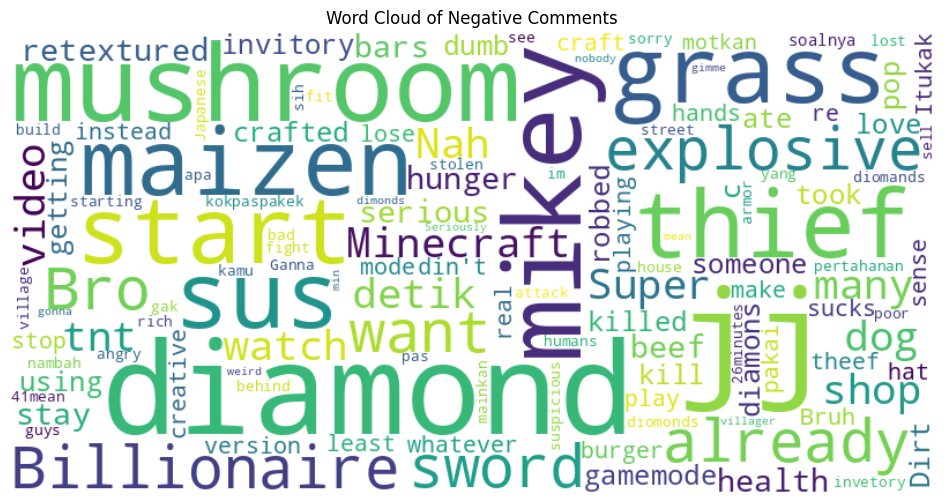

In [ ]:
text_data = ' '.join(Negative['text'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Comments")
plt.show()


Even if the negative comments, they are all about the video content, especially about why the charaters in the video do something.

In [ ]:
Negative.to_csv('Negative.csv', index=False)

In [ ]:
comment_sorted1_copy.to_csv('comment_sorted1_copy.csv', index=False)